The objective of this is create an own implmentation using NumPy. Implementing basic models is a great idea to improve your comprehension about how they work

# Data set

We will use the well known Iris data set. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
To simplify things, we take just the first two feature columns. Also, the two non-linearly separable classes are labeled with the same
category, ending up with a binary classification problem.

In [30]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data[:, :2]
y = (iris.target !=0)*1

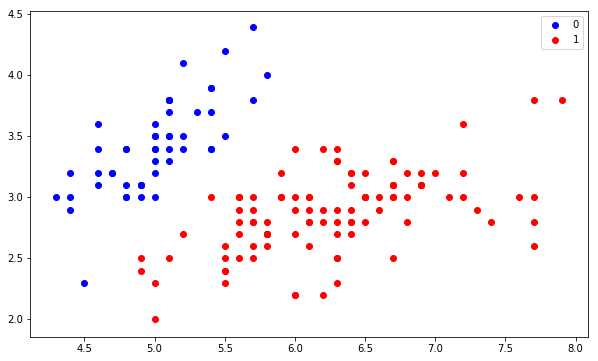

In [31]:
plt.figure(figsize = (10,6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color = 'b', label = '0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color = 'r', label = '1')
plt.legend()

# Algorithm

Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). Logistic
regression models the probability that each input belongs to a particular category.

<font face="微软雅黑" size=3 color=black >Hypothesis

A function takes inputs and returns outputs. bTo generate probabilities, logistic regression uses a function that gives outputs between
0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function.
From here we will refer to it as sigmoid.
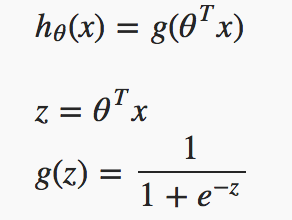
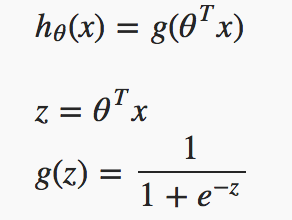

# Loss function

Functions have parameters/weights (represented by theta in our notation) and we want to find the best values for them. To start we pick 
random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using 
the loss function, defined as:

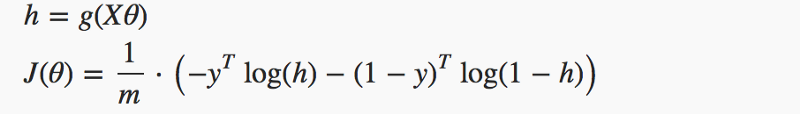

<font face="微软雅黑" size=4 color=black >Gradient descent

Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. The question is, how do we know what parameters should be biggers and what parameters should be smallers? The answer is given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.
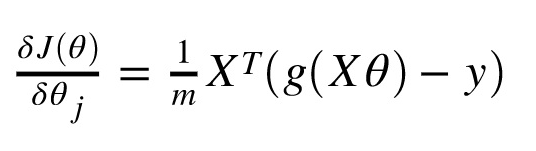

Then we update the weights by substracting to them the derivative times the learning rate.We should repeat this steps several times until we reach the optimal solution.

# Predictions

By calling the sigmoid function we get the probability that some input x belongs to class 1. Let’s take all probabilities ≥ 0.5 = class 1 and all probabilities < 0 = class 0. This threshold should be defined depending on the business problem we were working.

In [32]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [33]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [34]:
%time model.fit(x, y)

Wall time: 13.2 s


In [35]:
preds = model.predict(x)
(preds == y).mean()

1.0

In [36]:
model.theta

array([-25.96818124,  12.56179068, -13.44549335])

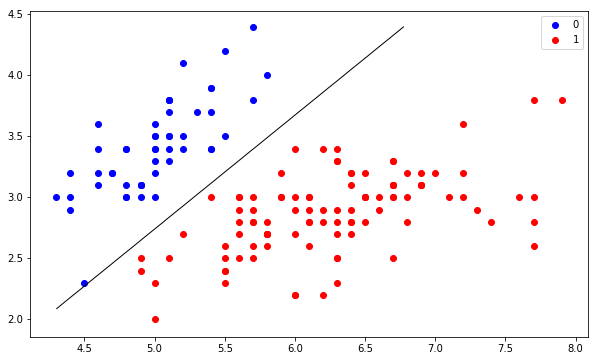

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='b', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = x[:,0].min(), x[:,0].max(),
x2_min, x2_max = x[:,1].min(), x[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');